![RDD key pair](media/05.numeric_rdd.png)

---
# 04 - RDDs numéricos
--------------

Funciones de estadística descriptiva implementadas en Spark

  Método              |  Descripción                       
  ------------------- | ---------------------------------- 
  stats()             | Resumen de estadísticas            
  mean()              | Media aritmética
  sum(), max(), min() | Suma, máximo y mínimo
  variance()          | Varianza de los elementos
  sampleVariance()    | Varianza de una muestra
  stdev()             | Desviación estándar
  sampleStdev()       | Desviación estándar de una muestra
  histogram()         | Histograma

In [1]:
!pip install pyspark

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Create apache spark context
from pyspark import SparkContext
sc = SparkContext(master="local", appName="Mi app")

In [3]:
# Stop apache spark context
sc.stop()

## Obtener un resúmen de estadísticas

In [6]:
# STATS

import numpy as np

# Un RDD con datos aleatorios de una distribución normal
nrdd = sc.parallelize(np.random.normal(size=10000)).cache()

# Resumen de estadísticas
sts = nrdd.stats()

print("Resumen de estadísticas:\n{0}\n".format(sts))

Resumen de estadísticas:
(count: 10000, mean: 0.016565092702759247, stdev: 0.9906881314645754, max: 3.940276682933942, min: -3.9202054258986507)



In [8]:
# MEAN

from math import fabs

# Filtra outliers
stddev = sts.stdev()
avg = sts.mean()

frdd = nrdd.filter(lambda x: fabs(x - avg) < 3*stddev).cache()

print("Número de outliers: {0}".format(sts.count() - frdd.count()))

Número de outliers: 25


x:  [-2.926630052775228, -2.336983793876538, -1.7473375349778482, -1.1576912760791582, -0.5680450171804683, 0.021601241718221864, 0.6112475006169116, 1.2008937595156013, 1.7905400184142914, 2.3801862773129816, 2.9698325362116718]
y:  [69, 299, 846, 1553, 2176, 2273, 1599, 828, 274, 58]


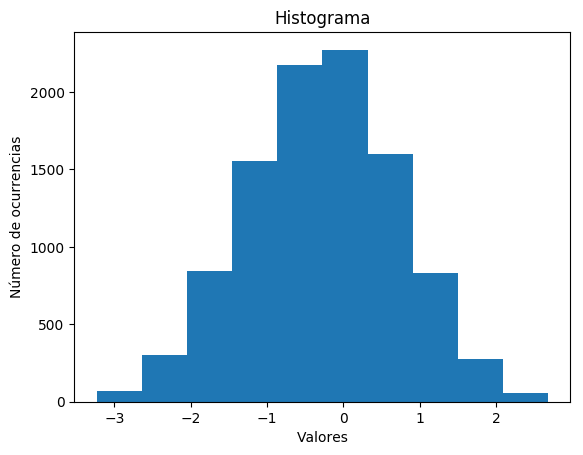

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

# Obtiene un histograma con 10 grupos
x,y = frdd.histogram(10)

print("x: ", x)
print("y: ", y)

# Limpia la gráfica
plt.gcf().clear()

plt.bar(x[:-1], y, width=0.6)
plt.xlabel(u'Valores')
plt.ylabel(u'Número de ocurrencias')
plt.title(u'Histograma')

plt.show()

### Ejemplo práctico

Número de patentes por año de un país

In [3]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from operator import add
    
# Lee los datos como un rdd
rdd = sc.textFile("data/apat63_99.txt")
print(rdd.take(1))
print(rdd.top(1))


['"PATENT","GYEAR","GDATE","APPYEAR","COUNTRY","POSTATE","ASSIGNEE","ASSCODE","CLAIMS","NCLASS","CAT","SUBCAT","CMADE","CRECEIVE","RATIOCIT","GENERAL","ORIGINAL","FWDAPLAG","BCKGTLAG","SELFCTUB","SELFCTLB","SECDUPBD","SECDLWBD"']
['6009554,1999,14606,1997,"US","NY",219390,2,,714,2,22,9,0,1,,,,12.7778,0.1111,0.1111,,']


Media de patentes entre el año 1963 y el 1999 = 48242.94594594595


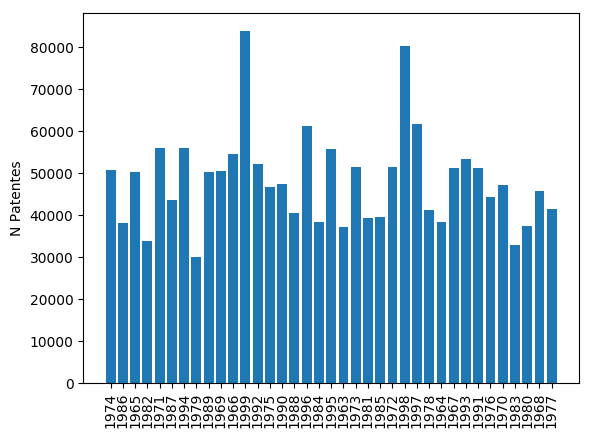

In [4]:
# Obtiene un rdd que nos proporcione, para las patentes "US" el número de 
# patentes por año (año, número_de_patentes) ordenadas por año
yearNum = rdd.filter(lambda l: '"US"' in l).\
              map(lambda l: l.split(',')).\
              map(lambda l: (l[1], 1)).\
              reduceByKey(add)
              
yearNum.take(5)

# Calcula la media del número de patentes
media = yearNum.values().mean()

print("Media de patentes entre el año {0} y el {1} = {2}".format(
       yearNum.keys().min(),
       yearNum.keys().max(),
       media
       ))

# Crea el gráfico
# Obtén los años como una lista
years = yearNum.keys().collect()
# Obtén el número de patentes como una lista
numPats = yearNum.values().collect()

# Descomentar para gráfica
plt.gcf().clear() 
yearsRange = np.arange(len(years))
plt.bar(yearsRange, numPats, align='center')
plt.xticks(yearsRange, years, fontsize=10, rotation=90)
plt.ylabel("N Patentes")
plt.show()